In [26]:
import matplotlib.pyplot as plt
import numpy as np
import os
from imageio import imread
from skimage.color import rgb2gray
from skimage.morphology import binary_opening, binary_closing
from scipy.ndimage.morphology import binary_fill_holes
from skimage.measure import label, regionprops
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.transform import warp, AffineTransform, rotate
from skimage.feature import canny

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

In [27]:
def rotate_pic(img, center):
    h, theta, d = hough_line(canny(img_gray))
    average_angle = 0
    size = 0
    for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
        if angle > angle_eps:
            average_angle += angle
            size += 1
            print('angle on iter:', np.degrees(angle))
    if average_angle > size * angle_eps:
        img = rotate(img, np.rad2deg(average_angle))
    print('avgangle: ' + str(average_angle))

In [28]:
def find_largest_components(mask, img, obj_name, ax):
    # ищем максимальную компоненту
    labels = label(mask)
    props = regionprops(labels)
    areas = [prop.area for prop in props]
    largest_comp_id = np.array(areas).argmax()
    # вычисляем размеры "коробки" вокруг аудиогида
    minr, minc, maxr, maxc = props[largest_comp_id].bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    if obj_name == 'box':
        ax.plot(bx, by, '-b', linewidth=1)
    else:
        ax.plot(bx, by, '-r', linewidth=1)
    
    # ширина прямоугольника вокруг аудиогида
    box_width = maxr - minr     
    
    # высота прямоугольника вокруг аудиогида
    box_height = maxc - minc      
    
    # возвращаем характерные размеры аудиогида (коробка в которую он помещается)
    return box_width, box_height

In [34]:
def find_box(img, img_gray, ax):
    edge_map = binary_closing(canny(img_gray, sigma=1), selem=np.ones((9, 9)))
    areas = binary_fill_holes(edge_map)
    return find_largest_components(areas, img, 'box', ax)

In [30]:
def find_audioguide(img, img_gray, ax):
    black_mask = img_gray < 0.25
    #audioguide_mask = binary_opening(black_mask, selem=np.ones((30, 30)))
    return find_largest_components(black_mask, img, 'audio', ax)

In [31]:
def eval_tests(img, img_gray):
    
    fig, ax = plt.subplots(1, 1, figsize=(15, 6))
    w_box, h_box = find_box(img, img_gray, ax)
    w_audio, h_audio = find_audioguide(img, img_gray, ax)
    test_res = w_box > w_audio and h_box > h_audio
    ax.imshow(img, cmap='gray')
    plt.show()
    print(f'Test result:{test_res}')
    return test_res

In [32]:
angle_eps = np.radians(3) # угол при котором мы еще не поворачиваем картинку

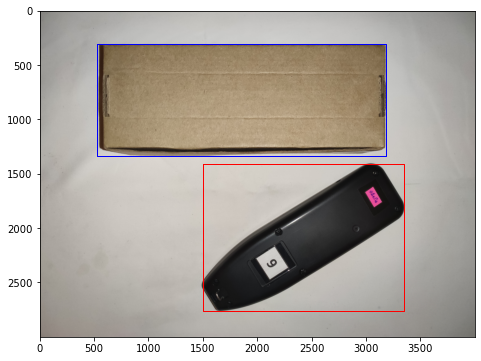

Test result:False


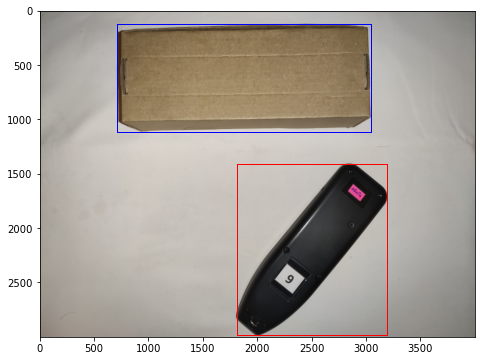

Test result:False


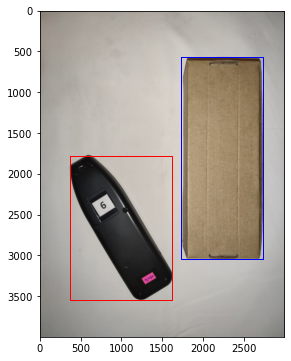

Test result:False


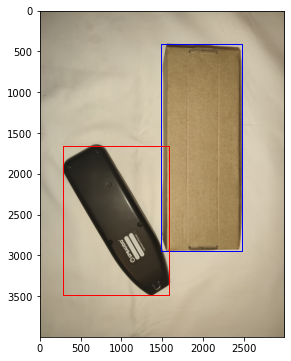

Test result:False


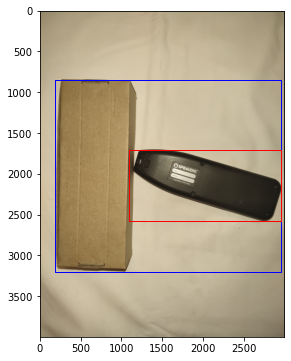

Test result:True


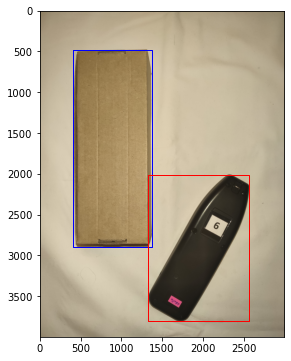

Test result:False


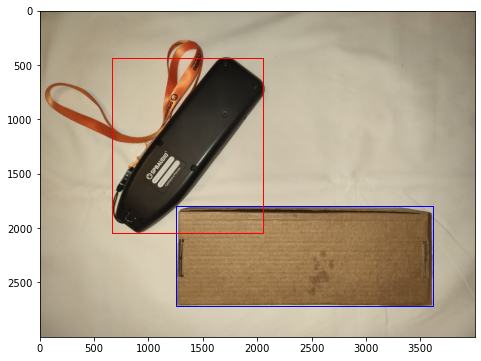

Test result:False


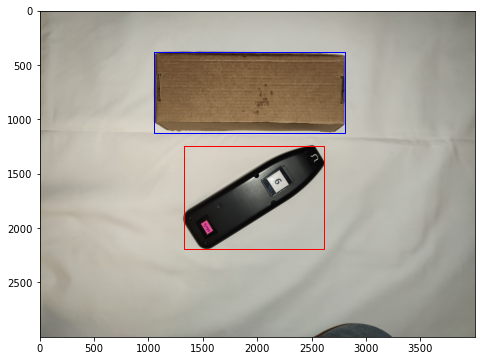

Test result:False


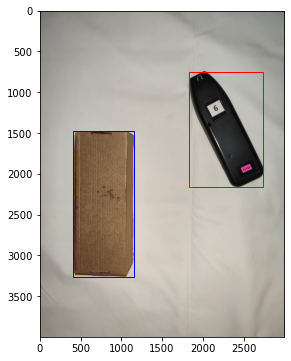

Test result:False


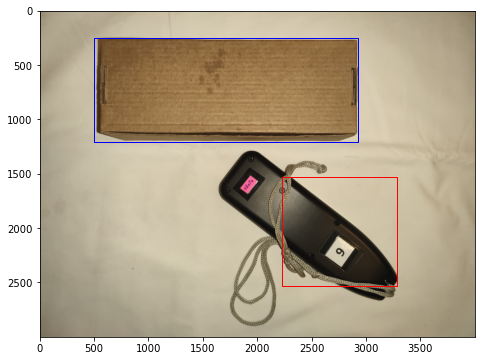

Test result:False


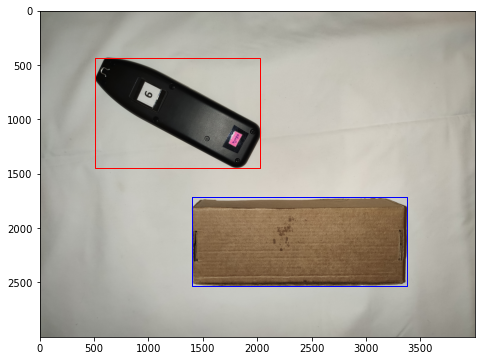

Test result:False


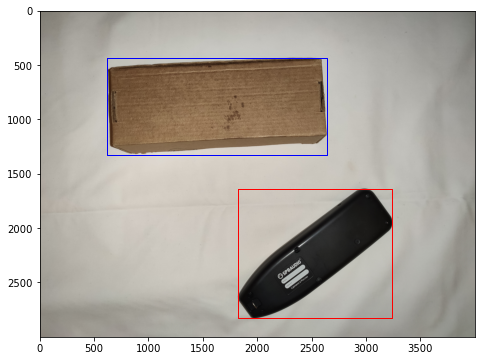

Test result:False


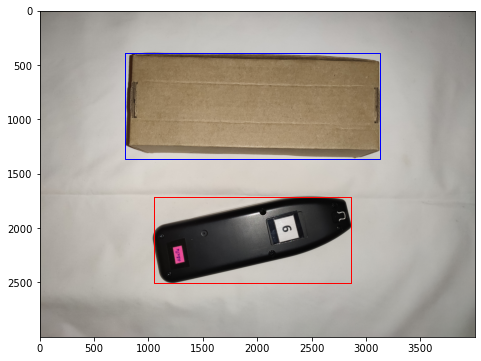

Test result:True


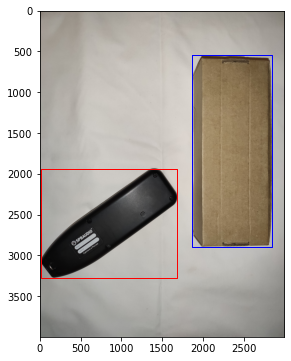

Test result:False


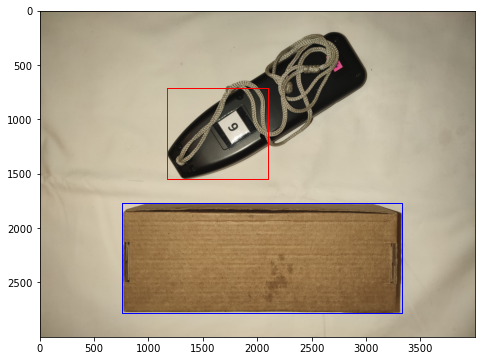

Test result:True


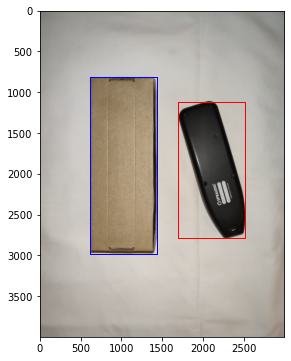

Test result:True


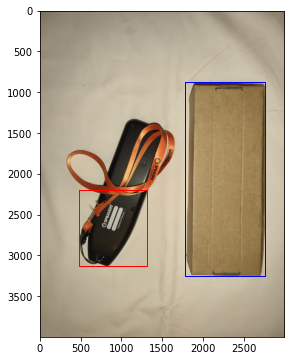

Test result:True


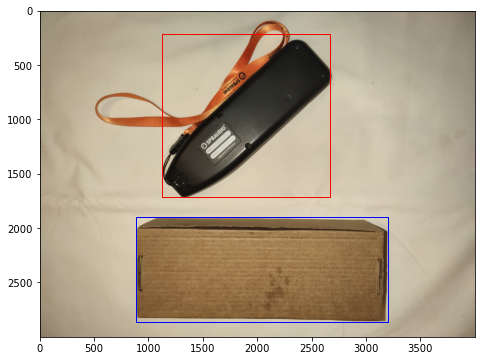

Test result:False


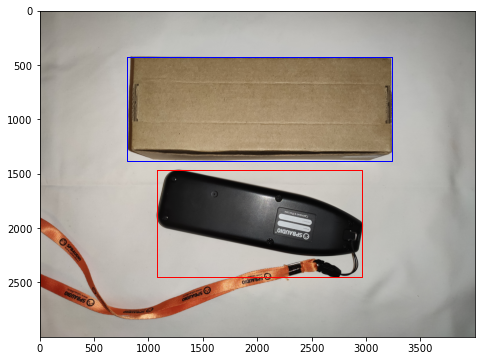

Test result:False


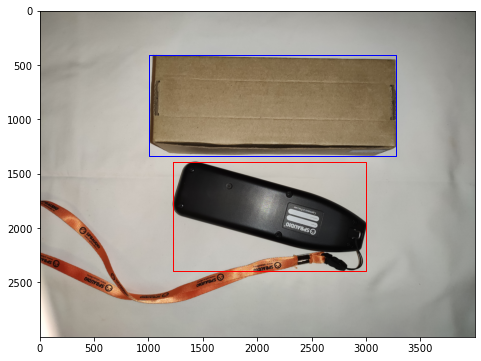

Test result:False


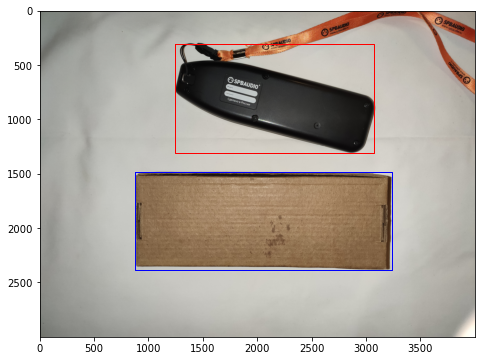

Test result:False


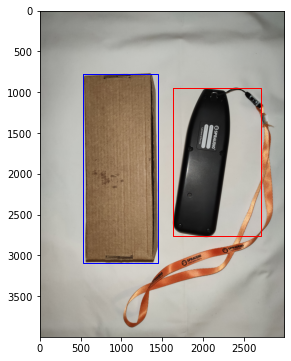

Test result:False


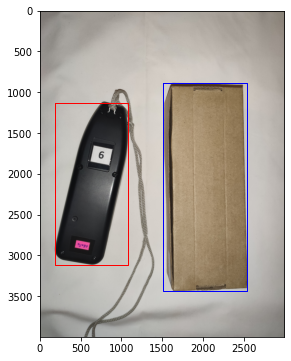

Test result:True


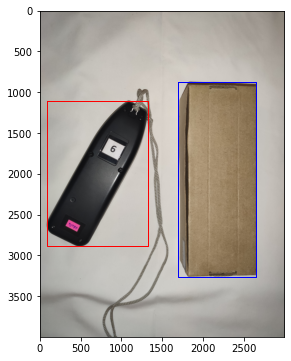

Test result:False


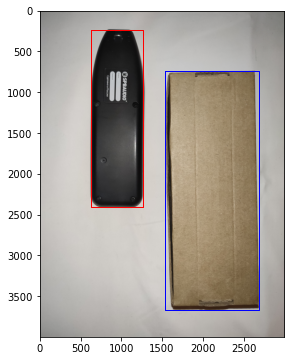

Test result:True


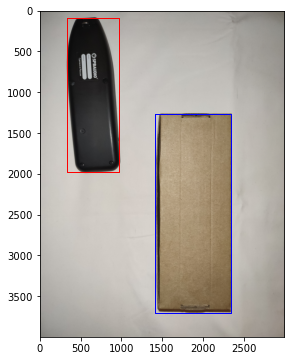

Test result:True


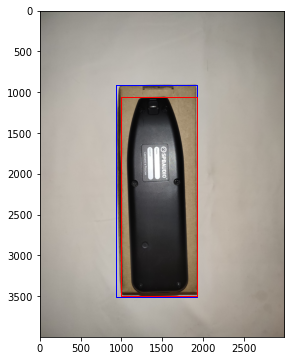

Test result:True


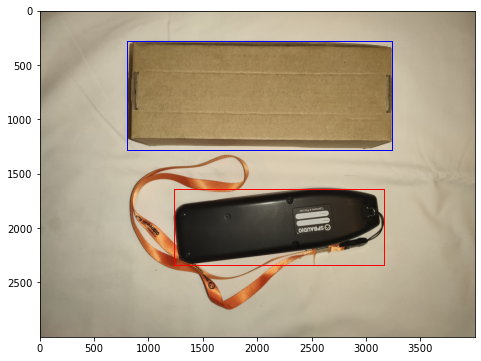

Test result:True


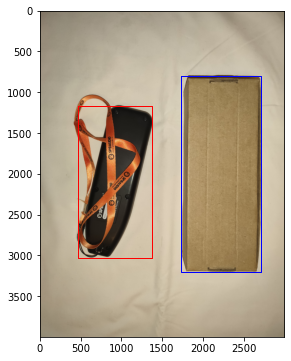

Test result:True


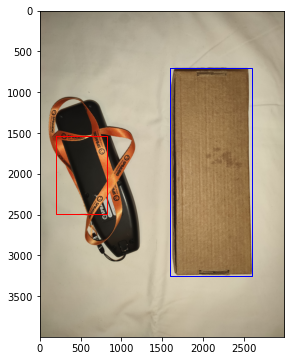

Test result:True


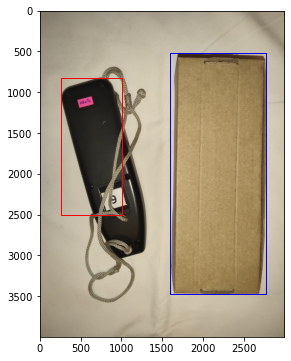

Test result:True


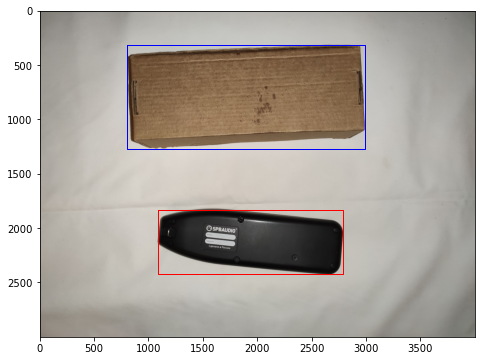

Test result:True


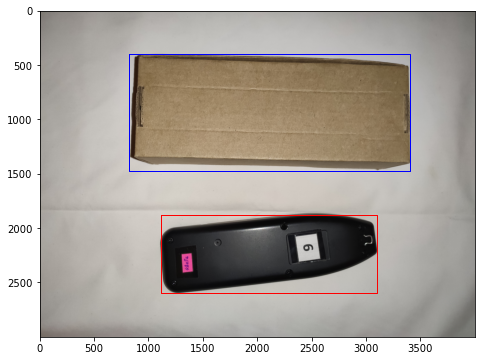

Test result:True


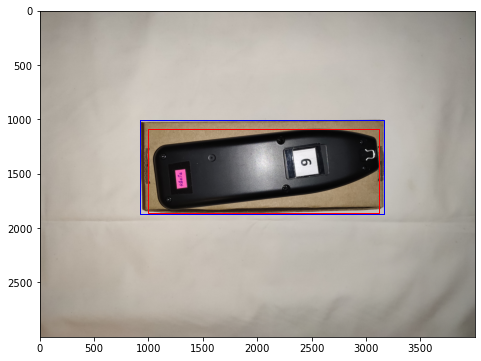

Test result:True


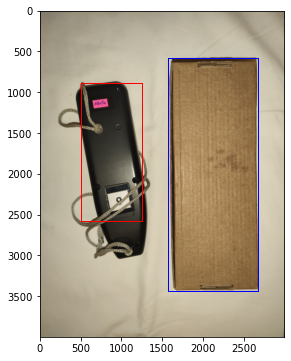

Test result:True


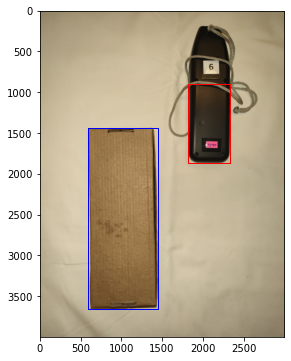

Test result:True


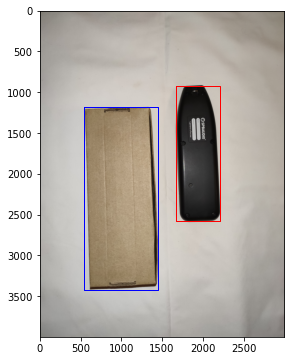

Test result:True


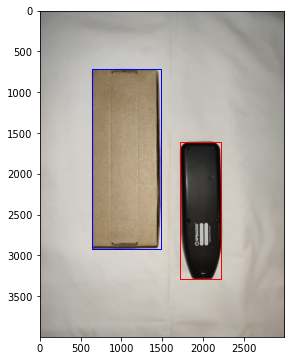

Test result:True


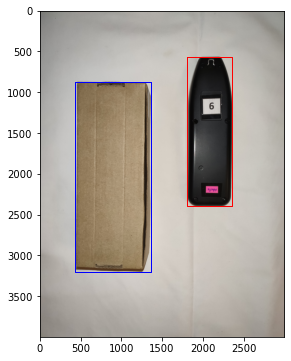

Test result:True


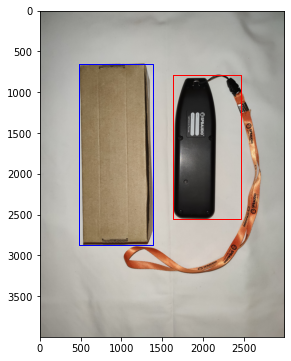

Test result:True


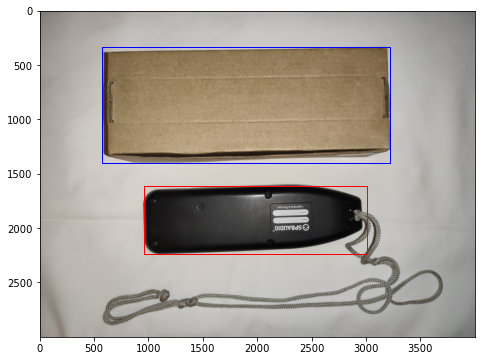

Test result:True


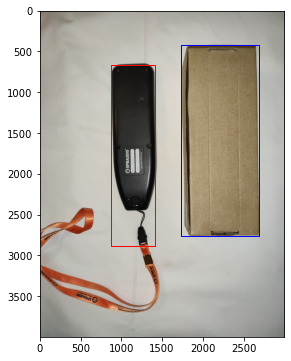

Test result:True


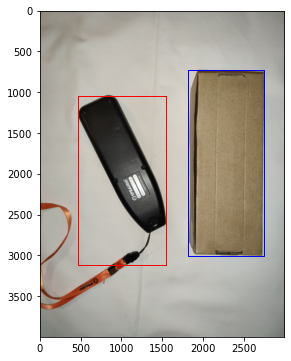

Test result:False


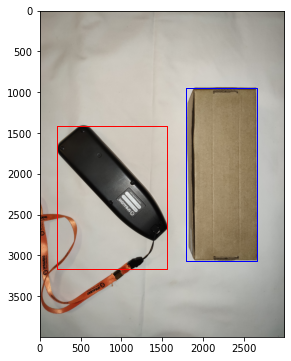

Test result:False


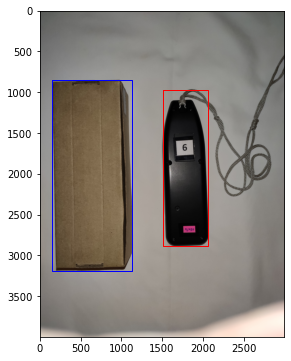

Test result:True


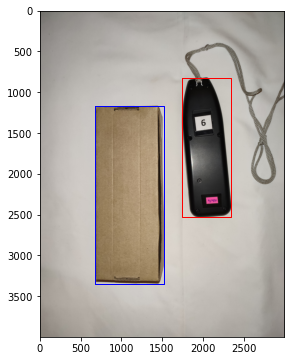

Test result:True
Right negatives: 18 / 24
Right positives: 20 / 22


In [36]:
def run(folder, real_answer=True):
    good_answer = 0
    for name in os.listdir(folder):
        path = os.path.join(folder, name)
        img = imread(path)
        img_gray = rgb2gray(img)
        res = eval_tests(img, img_gray)
        if res == real_answer:
            good_answer += 1
    return good_answer, len(os.listdir(folder))

true_neg, neg_data_len = run("dataSet/False/", False)
true_pos, pos_data_len = run("dataSet/True/", True)

In [ ]:
print(f'Right negatives: {true_neg} / {neg_data_len}' )
print(f'Right positives: {true_pos} / {pos_data_len}')

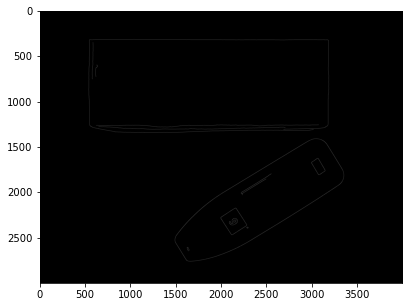